https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

Student-s-Performance-Analytics
Students Performance Evaluation using Feature Engineering, Feature Extraction, Manipulation of Data, Data Analysis, Data Visualization and at lat applying Classification Algorithms from Machine Learning to Separate Students with different grades

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [158]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [15]:
df.isna()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [160]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [21]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [161]:
categorical_cols =  df.select_dtypes(include='object').columns

In [162]:
for i in categorical_cols:
    # print(df[i].value_counts())
    print(df[i].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [163]:
df.isnull().sum()
# we don't have any null values

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [164]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [165]:
df['gender'].nunique()

2

In [166]:
df.isna().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [167]:
for col in df.columns:
    print(col)
    print(f'The number of unique items in {col} is {df[col].nunique()}')
    print(df[col].unique())

gender
The number of unique items in gender is 2
['female' 'male']
race/ethnicity
The number of unique items in race/ethnicity is 5
['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education
The number of unique items in parental level of education is 6
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch
The number of unique items in lunch is 2
['standard' 'free/reduced']
test preparation course
The number of unique items in test preparation course is 2
['none' 'completed']
math score
The number of unique items in math score is 81
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
reading score
The number of unique items in read

In [168]:
# another way
for col in df.select_dtypes(include=['object']).columns.tolist():
    print(f'The number of unique items in {col} is {df[col].nunique()}')
    print(df[col].unique())

The number of unique items in gender is 2
['female' 'male']
The number of unique items in race/ethnicity is 5
['group B' 'group C' 'group A' 'group D' 'group E']
The number of unique items in parental level of education is 6
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
The number of unique items in lunch is 2
['standard' 'free/reduced']
The number of unique items in test preparation course is 2
['none' 'completed']


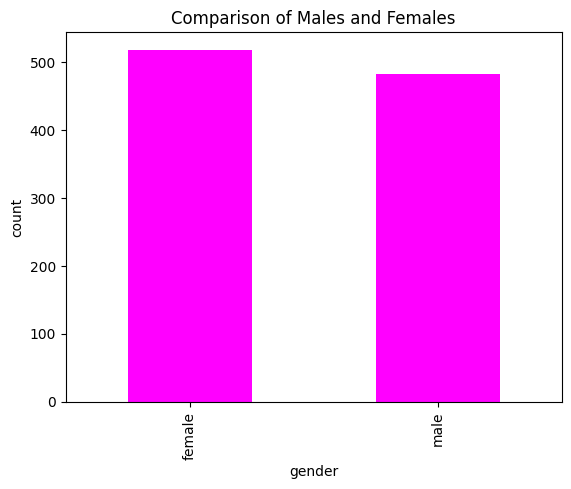

In [22]:
# visualising the number of male and female in the dataset

df['gender'].value_counts(normalize = True)
df['gender'].value_counts(dropna = False).plot.bar(color = 'magenta')
plt.title('Comparison of Males and Females')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()


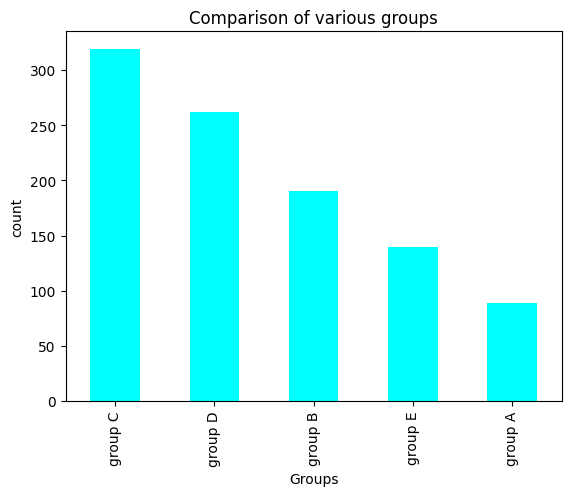

In [23]:
# visualizing the different groups in the dataset

df['race/ethnicity'].value_counts(normalize = True)
df['race/ethnicity'].value_counts(dropna = False).plot.bar(color = 'cyan')
plt.title('Comparison of various groups')
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

In [25]:
df['race/ethnicity'].value_counts()

,count
race/ethnicity,
group C,319
group D,262
group B,190
group E,140
group A,89


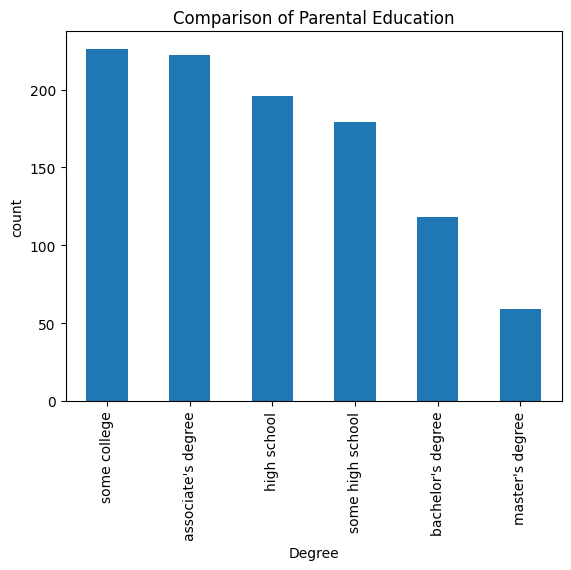

In [27]:
# visualizing the differnt parental education levels

df['parental level of education'].value_counts(normalize = True)
df['parental level of education'].value_counts(dropna = False).plot.bar()
plt.title('Comparison of Parental Education')
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

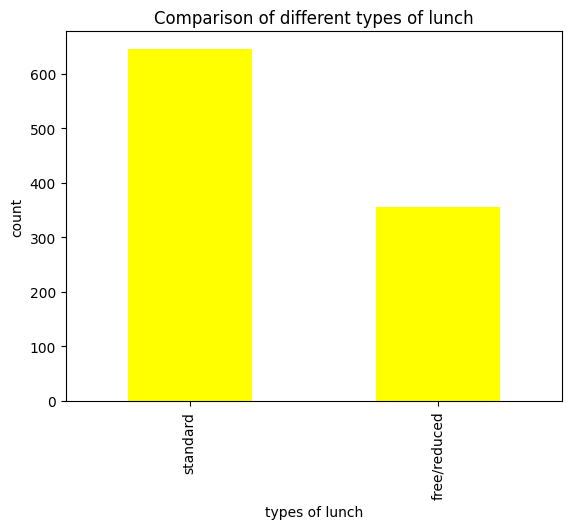

In [28]:
# visualizing different types of lunch

df['lunch'].value_counts(normalize = True)
df['lunch'].value_counts(dropna = False).plot.bar(color = 'yellow')
plt.title('Comparison of different types of lunch')
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()


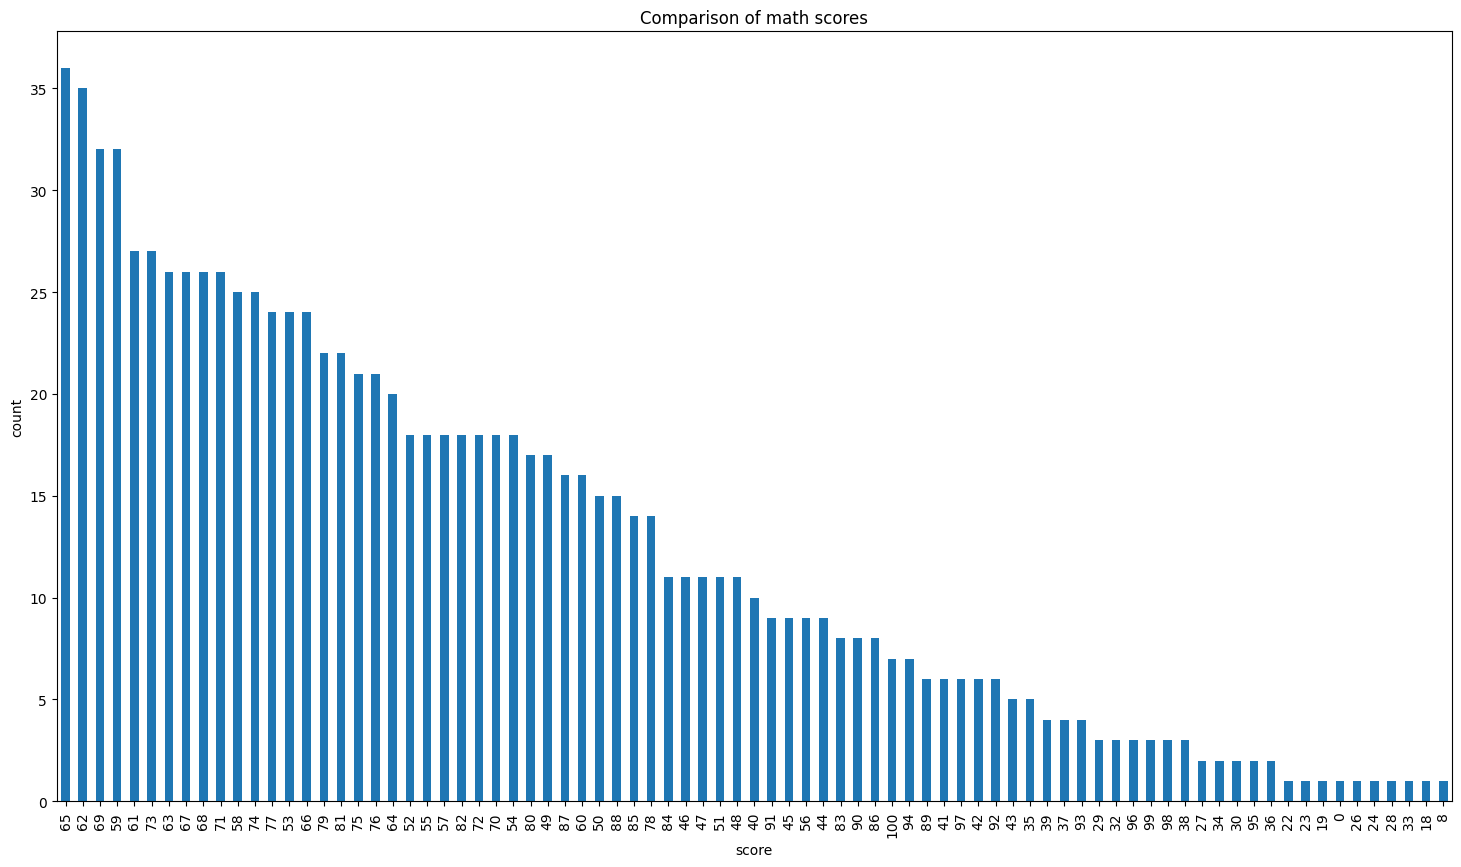

In [29]:
# visualizing maths score

df['math score'].value_counts(normalize = True)
df['math score'].value_counts(dropna = False).plot.bar(figsize = (18, 10))
plt.title('Comparison of math scores')
plt.xlabel('score')
plt.ylabel('count')
plt.show()


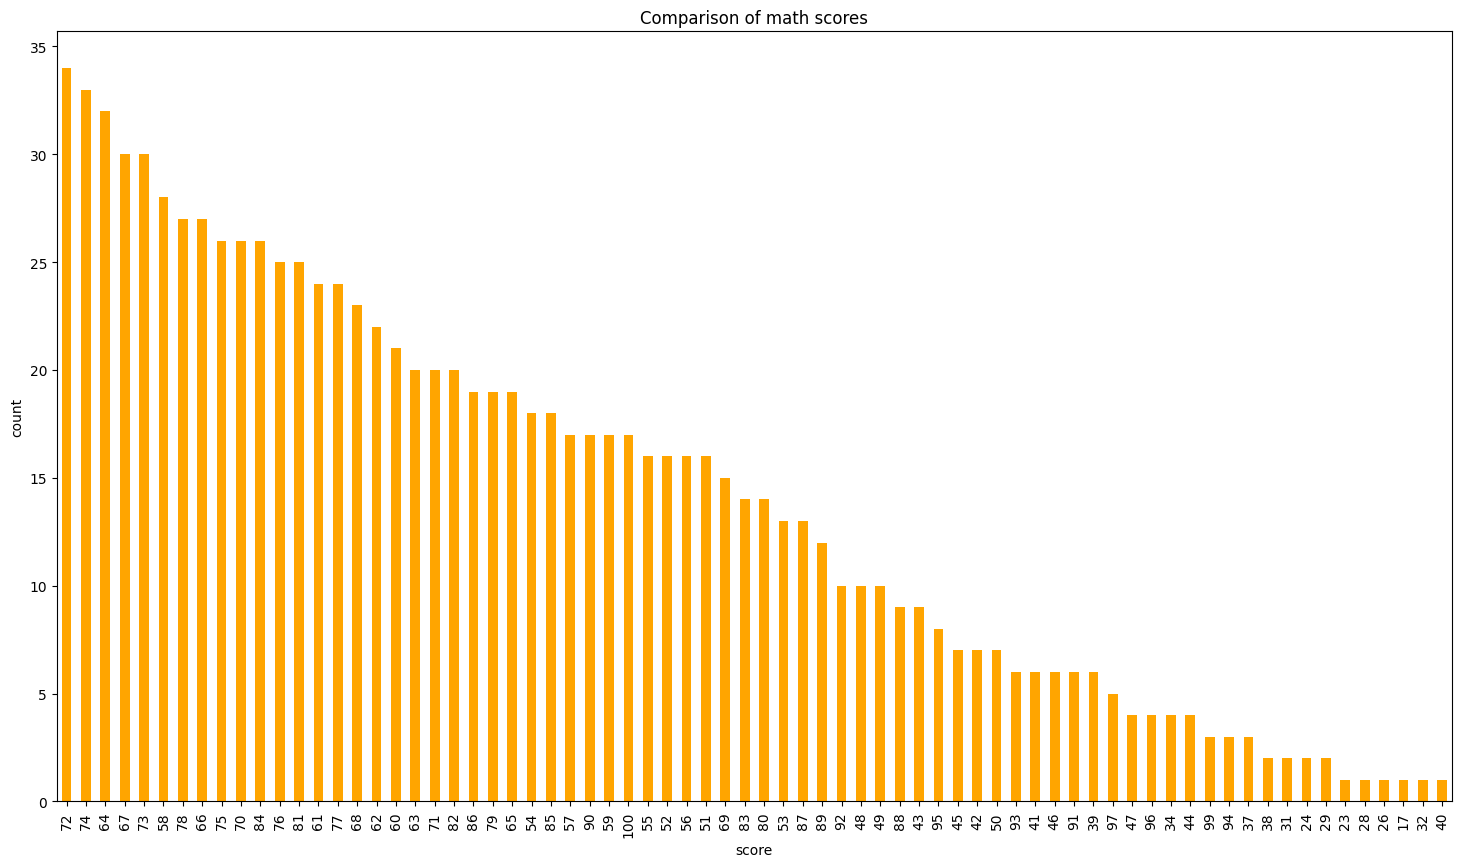

In [31]:
# visualizing reading score score

df['reading score'].value_counts(normalize = True)
df['reading score'].value_counts(dropna = False).plot.bar(figsize = (18, 10), color = 'orange')
plt.title('Comparison of math scores')
plt.xlabel('score')
plt.ylabel('count')
plt.show()


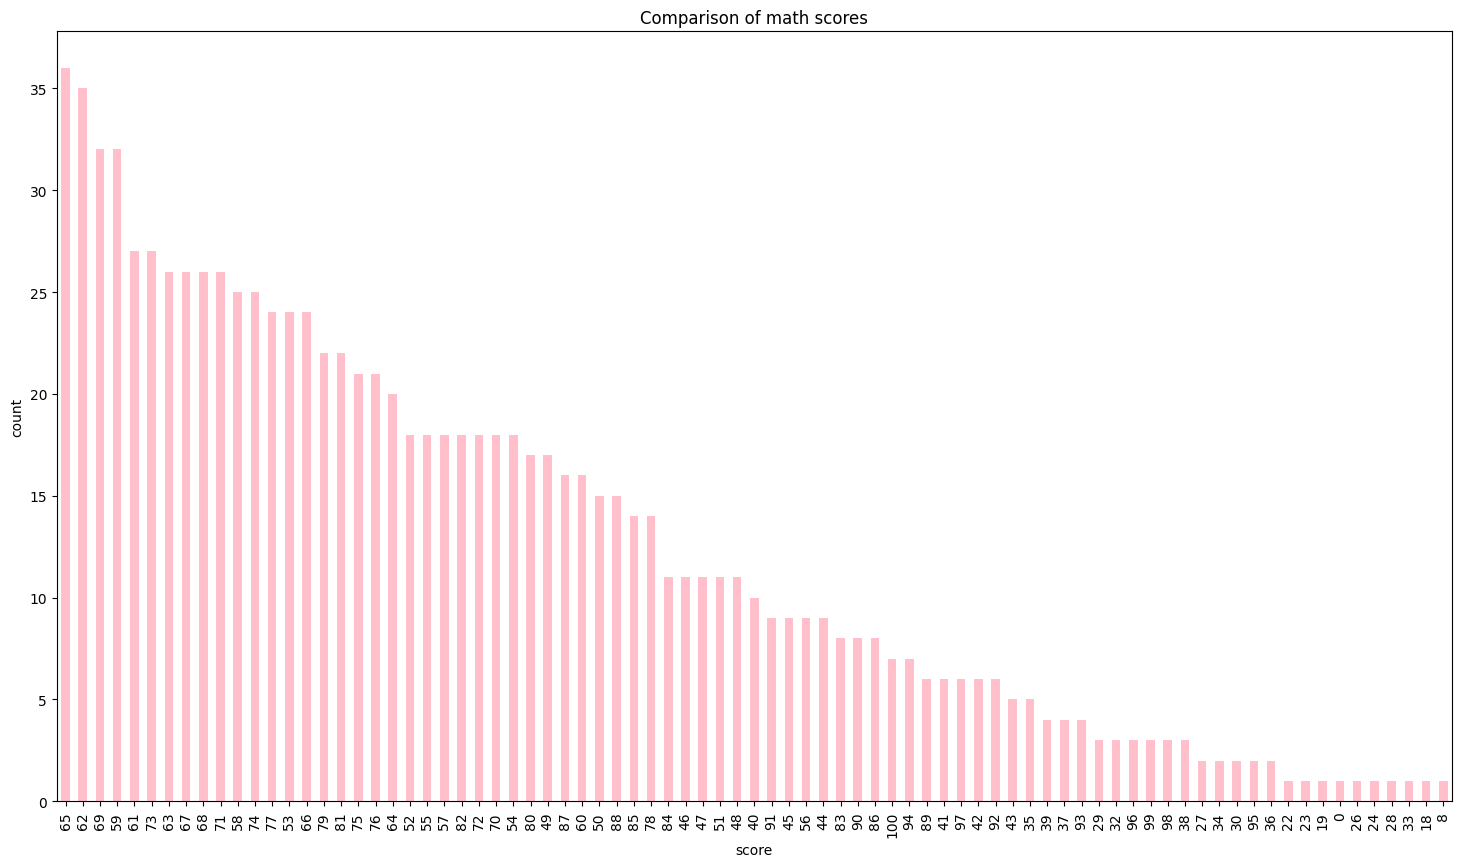

In [32]:
# visualizing writing score

df['math score'].value_counts(normalize = True)
df['math score'].value_counts(dropna = False).plot.bar(figsize = (18, 10), color = 'pink')
plt.title('Comparison of math scores')
plt.xlabel('score')
plt.ylabel('count')
plt.show()

<Axes: xlabel='gender'>

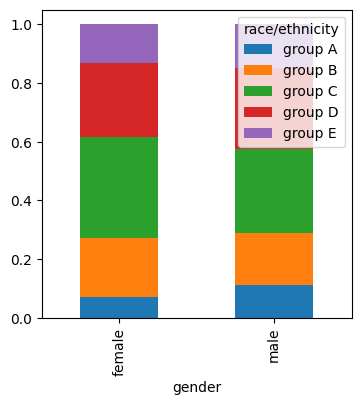

In [34]:
# gender vs race/etnicity

x = pd.crosstab(df['gender'], df['race/ethnicity'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4, 4))


<Axes: xlabel='race/ethnicity'>

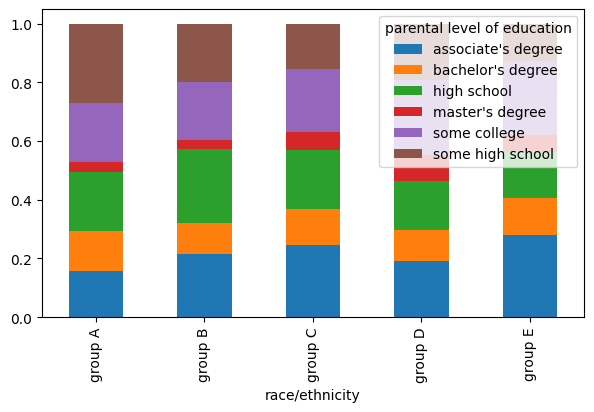

In [35]:
# comparison of race/ethnicity and parental level of education

x = pd.crosstab(df['race/ethnicity'], df['parental level of education'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = 'True', figsize = (7, 4) )


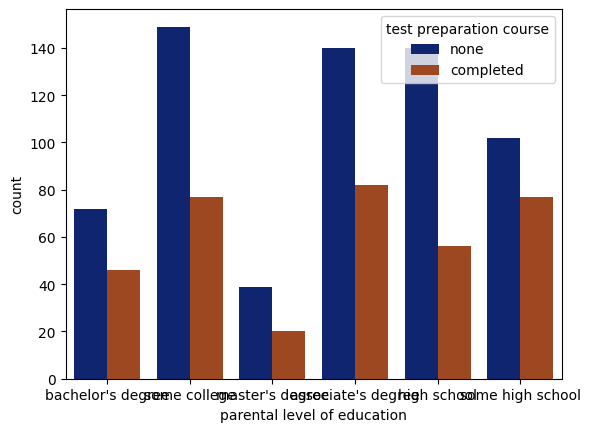

In [36]:
# comparison of parental degree and test course

sns.countplot(x = 'parental level of education', data = df, hue = 'test preparation course', palette = 'dark')
plt.show()


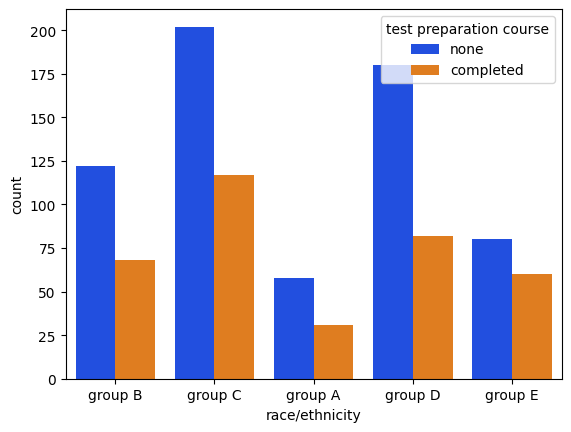

In [37]:
# comparison of race/ethnicity and test preparation course

sns.countplot(x = 'race/ethnicity', data = df,  hue = 'test preparation course', palette = 'bright')
plt.show()


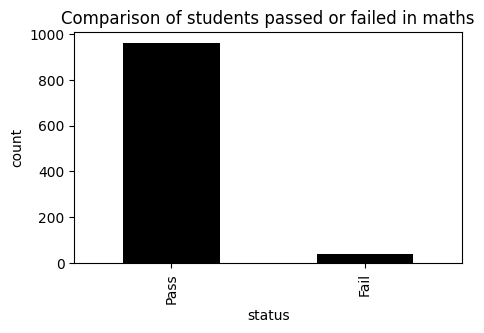

In [38]:
# feature engineering on the data to visualize and solve the dataset more accurately

# setting a passing mark for the students to pass on the three subjects individually
passmarks = 40

# creating a new column pass_math, this column will tell us whether the students are pass or fail
df['pass_math'] = np.where(df['math score']< passmarks, 'Fail', 'Pass')
df['pass_math'].value_counts(dropna = False).plot.bar(color = 'black', figsize = (5, 3))

plt.title('Comparison of students passed or failed in maths')
plt.xlabel('status')
plt.ylabel('count')
plt.show()


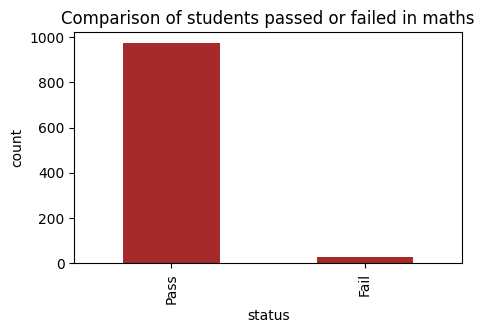

In [39]:
# creating a new column pass_math, this column will tell us whether the students are pass or fail
df['pass_reading'] = np.where(df['reading score']< passmarks, 'Fail', 'Pass')
df['pass_reading'].value_counts(dropna = False).plot.bar(color = 'brown', figsize = (5, 3))

plt.title('Comparison of students passed or failed in maths')
plt.xlabel('status')
plt.ylabel('count')
plt.show()

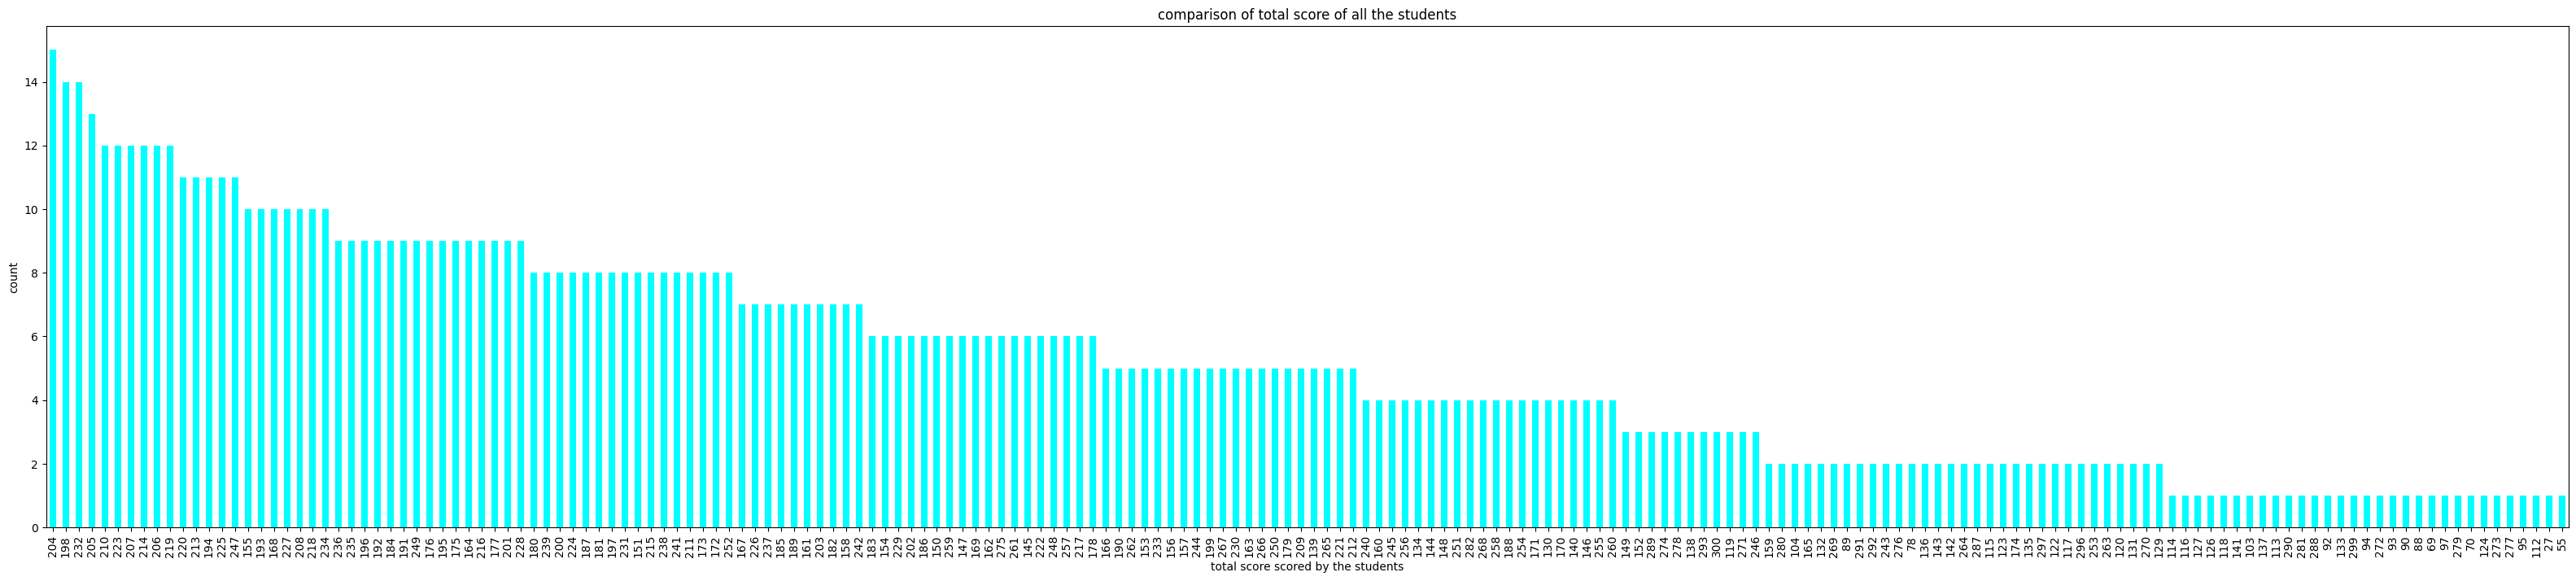

In [40]:
# computing the total score for each student

df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

df['total_score'].value_counts(normalize = True)
df['total_score'].value_counts(dropna = True).plot.bar(color = 'cyan', figsize = (40, 8))

plt.title('comparison of total score of all the students')
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['percentage'][i] = ceil(df['percentage'][i])
<ipython-input-41-a34f93af8893>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['percentage'][i] = ceil(df['percentage'][i])
<ipython-input-41-a34f93af8893>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typi

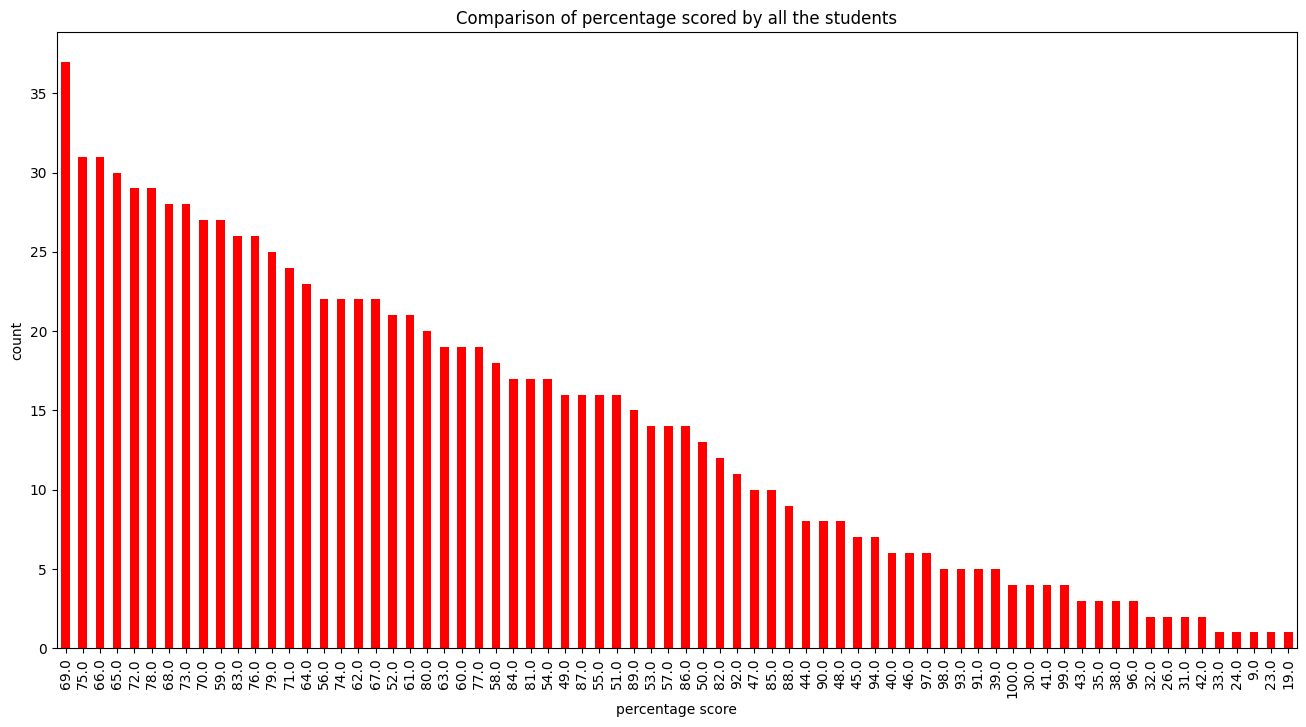

In [41]:
# computing percentage for each of the students
# importing math library to use ceil
from math import *

df['percentage'] = df['total_score']/3

for i in range(0, 1000):
  df['percentage'][i] = ceil(df['percentage'][i])

df['percentage'].value_counts(normalize = True)
df['percentage'].value_counts(dropna = False).plot.bar(figsize = (16, 8), color = 'red')

plt.title('Comparison of percentage scored by all the students')
plt.xlabel('percentage score')
plt.ylabel('count')
plt.show()

## **Histogram**

(array([  2.,   2.,  10.,  26.,  95., 188., 268., 216., 135.,  58.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

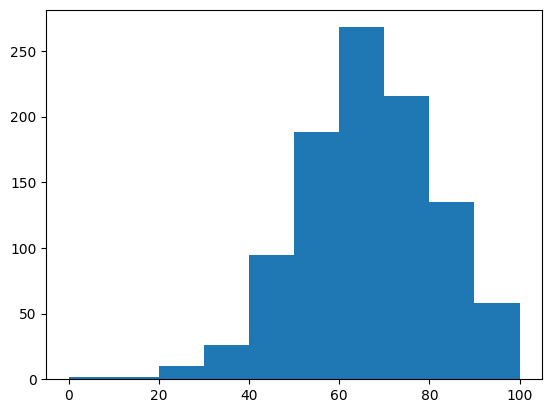

In [169]:
 plt.hist(df['math score'])

(array([  2.,   6.,  14.,  55., 126., 161., 223., 225., 120.,  68.]),
 array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.]),
 <BarContainer object of 10 artists>)

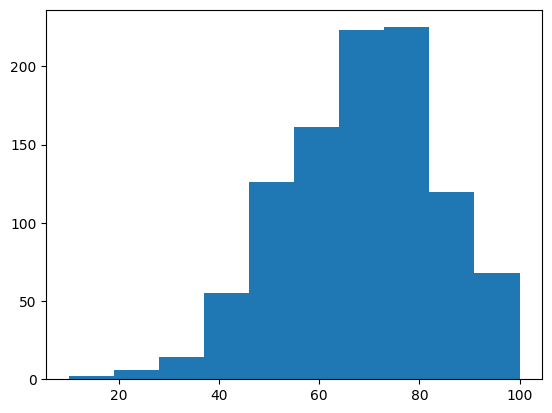

In [170]:
 plt.hist(df['writing score'])

[Text(0.5, 1.0, 'writing score')]

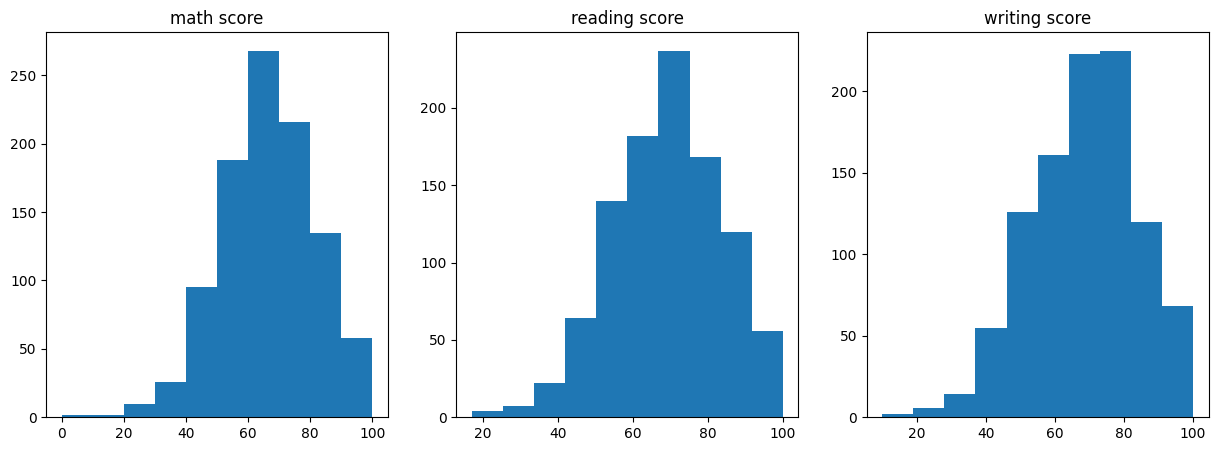

In [171]:
fig, ax= plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax[0].hist(df['math score'])
ax[1].hist(df['reading score'])
ax[2].hist(df['writing score'])

ax[0].set(title='math score')
ax[1].set(title='reading score')
ax[2].set(title='writing score')

[Text(0.5, 1.0, 'writing score')]

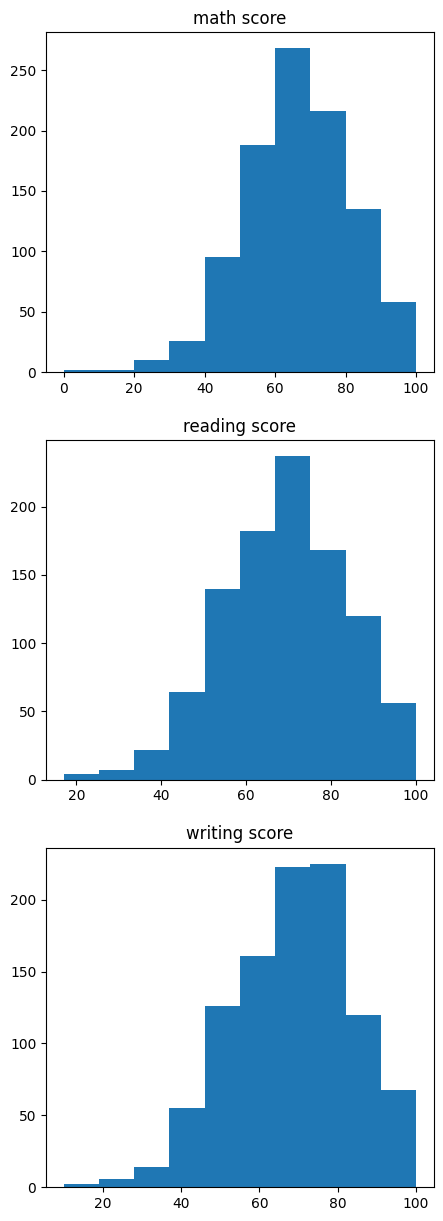

In [172]:
fig, ax= plt.subplots(nrows=3, ncols=1, figsize=(5, 15))
ax[0].hist(df['math score'])
ax[1].hist(df['reading score'])
ax[2].hist(df['writing score'])

ax[0].set(title='math score')
ax[1].set(title='reading score')
ax[2].set(title='writing score')

## **Bar plots**

<BarContainer object of 1000 artists>

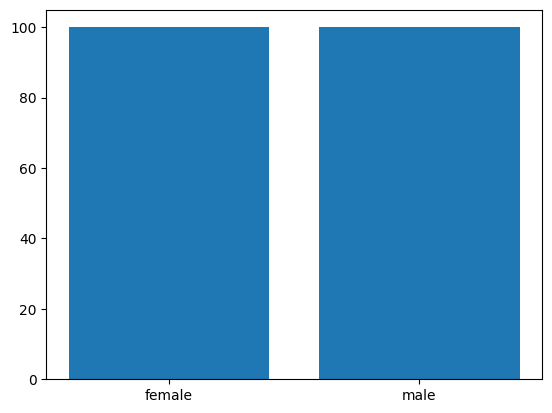

In [173]:
plt.bar(df['gender'], df['math score'])

<BarContainer object of 1000 artists>

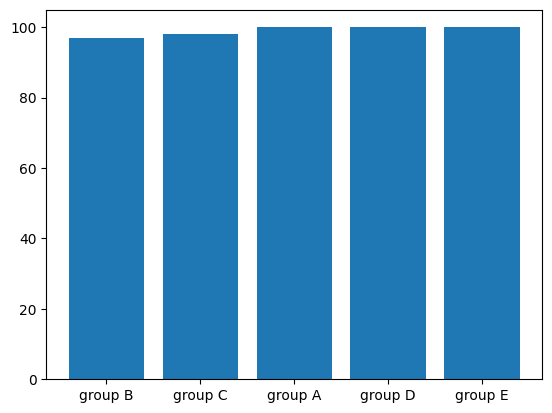

In [174]:
plt.bar(df['race/ethnicity'], df['math score'])

In [175]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [176]:
melted_df = df.melt(id_vars=['gender'], value_vars=['reading score', 'math score', 'writing score'], var_name='Score Type', value_name='Score')
melted_df

,gender,Score Type,Score
0,female,reading score,72
1,female,reading score,90
2,female,reading score,95
3,male,reading score,57
4,male,reading score,78
...,...,...,...
2995,female,writing score,95
2996,male,writing score,55
2997,female,writing score,65
2998,female,writing score,77


<Axes: xlabel='count', ylabel='gender'>

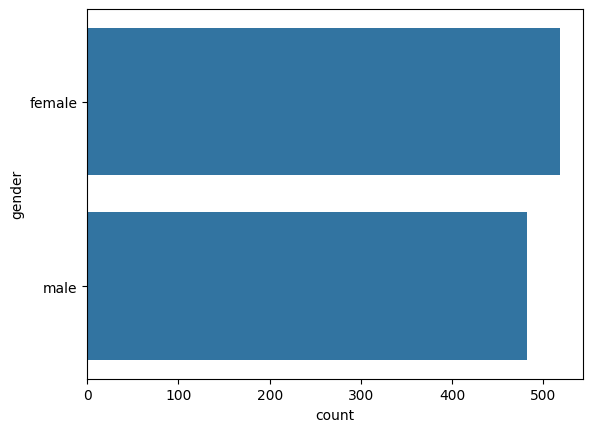

In [177]:
sns.countplot( df['gender'])

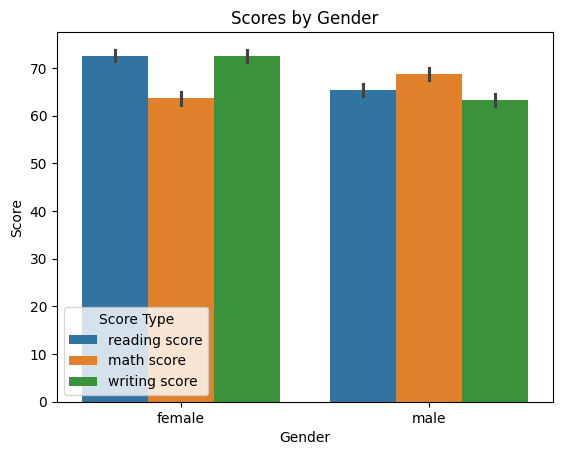

In [178]:
sns.barplot(x='gender', y='Score', hue='Score Type', data=melted_df)
plt.title('Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Score')
plt.legend(title='Score Type')
plt.show()

In [179]:
# function for bar plot
def plot_bar (category):
    melted_df = df.melt(id_vars=[category], value_vars=['reading score', 'math score', 'writing score'], var_name='Score Type', value_name='Score')
    sns.barplot(x=category, y='Score', hue='Score Type', data=melted_df)
    plt.title(f'Scores by {category}')
    plt.xlabel(category)
    plt.ylabel('Score')
    plt.legend(title='Score Type')
    plt.show()

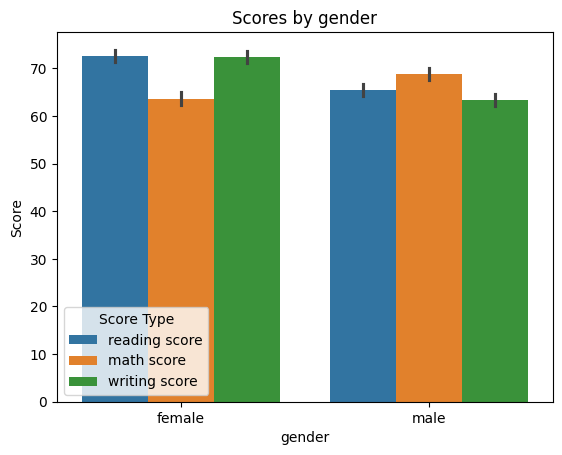

In [180]:
plot_bar('gender')

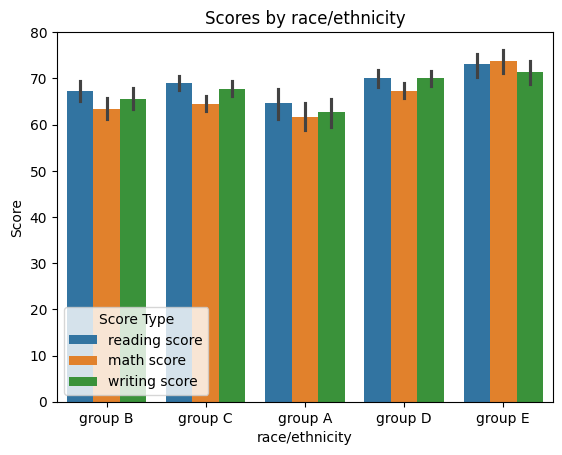

In [181]:
plot_bar('race/ethnicity')

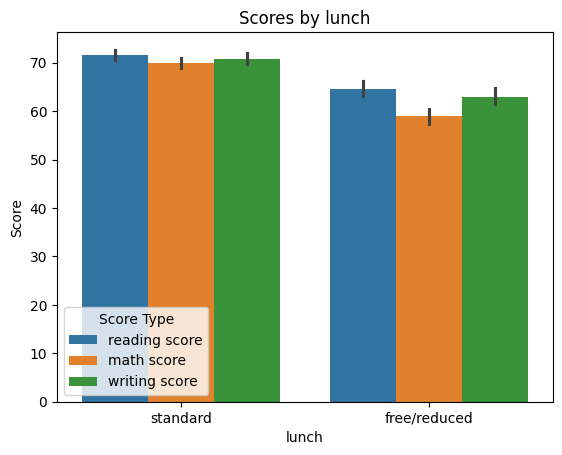

In [182]:
plot_bar('lunch')

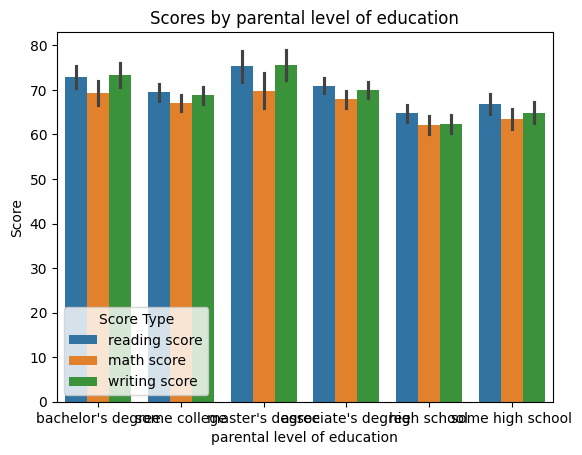

In [183]:
plot_bar('parental level of education')

# **How many students take preparatory classes**

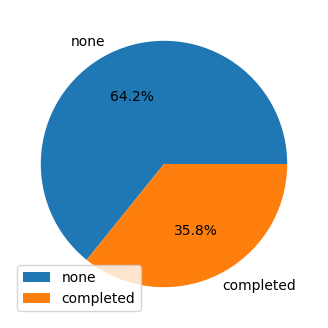

In [184]:
count_test = df['test preparation course'].value_counts()
labels = df['test preparation course'].value_counts().index
plt.figure(figsize=(4,4))
plt.pie(count_test, labels=labels, autopct='%1.1f%%')
plt.legend(labels)
plt.show()

In [185]:
df['avg_score'] = (df['math score'] + df['reading score'] + df['writing score'])/3

In [186]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


# **Student performance in subjects based on gender**

<Axes: xlabel='avg_score', ylabel='math score'>

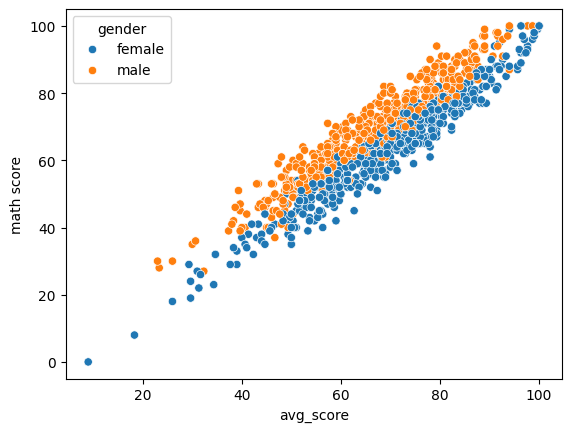

In [187]:
sns.scatterplot(x = df['avg_score'], y = df['math score'], hue = df['gender'])

<Axes: xlabel='avg_score', ylabel='reading score'>

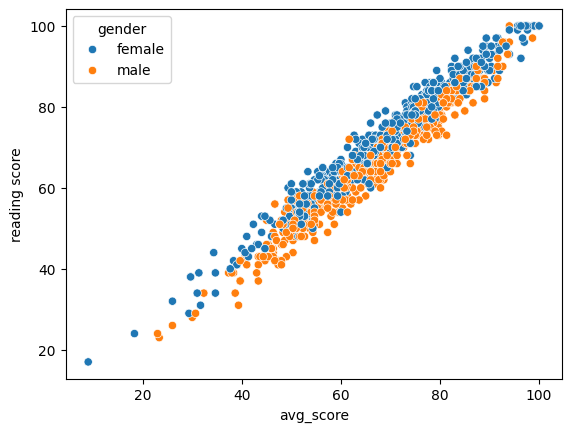

In [188]:
sns.scatterplot(x = df['avg_score'], y = df['reading score'], hue = df['gender'])

<Axes: xlabel='avg_score', ylabel='writing score'>

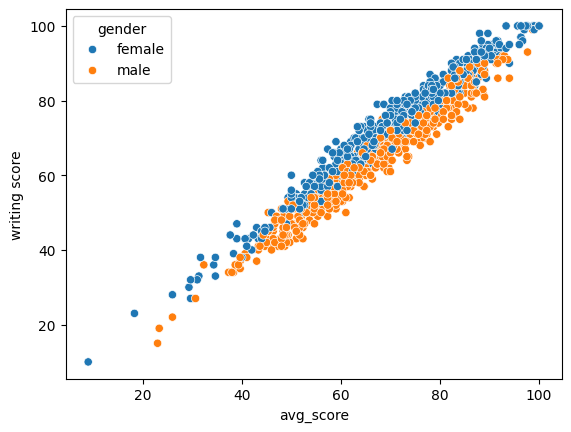

In [189]:
sns.scatterplot(x = df['avg_score'], y = df['writing score'], hue = df['gender'])

## **Heatmap**

In [16]:
correlation_matrix = df.select_dtypes(include=['number']).corr()
print(correlation_matrix)


               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


<Axes: >

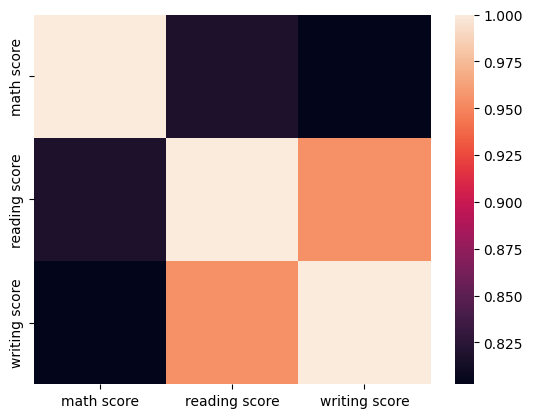

In [17]:
sns.heatmap(correlation_matrix)

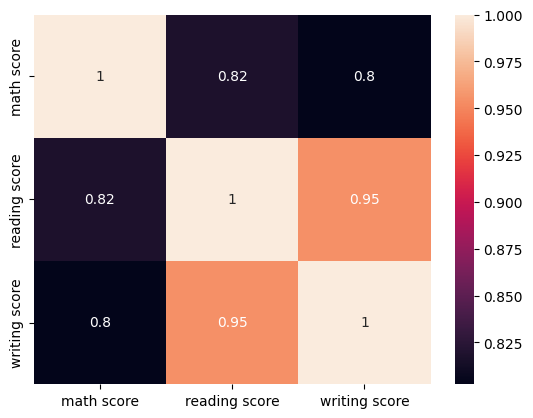

In [18]:
sns.heatmap(correlation_matrix, annot=True);

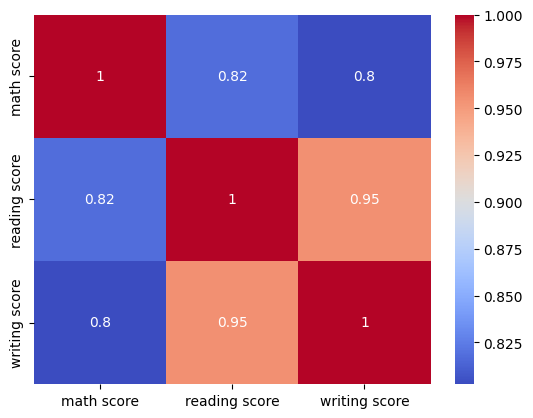

In [19]:

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm');

## **Scatter Plots**

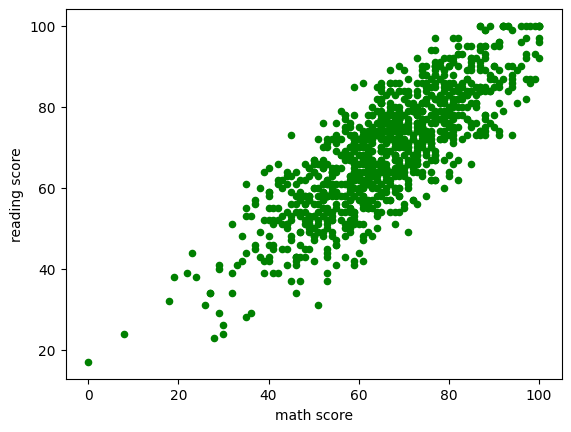

In [9]:
df.plot.scatter('math score', 'reading score', c='green');

<Axes: xlabel='math score', ylabel='reading score'>

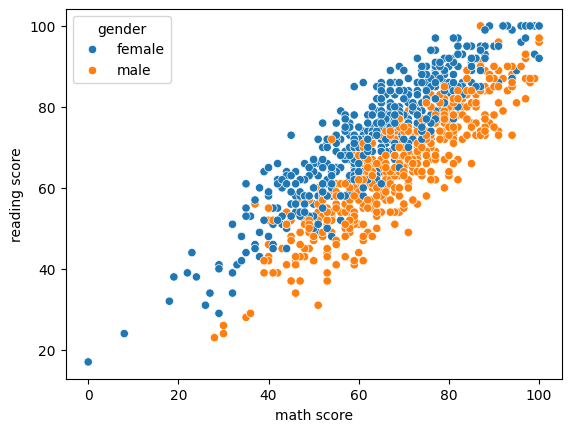

In [10]:
sns.scatterplot(data=df, x='math score', y='reading score', hue='gender')

In [11]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

<Axes: xlabel='math score', ylabel='reading score'>

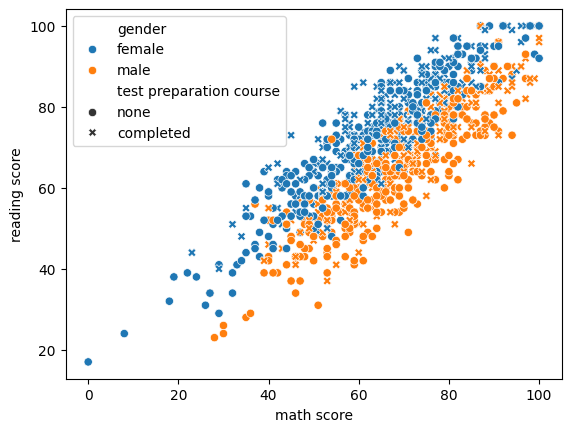

In [12]:
sns.scatterplot(data=df, x='math score', y='reading score', hue='gender', style='test preparation course')

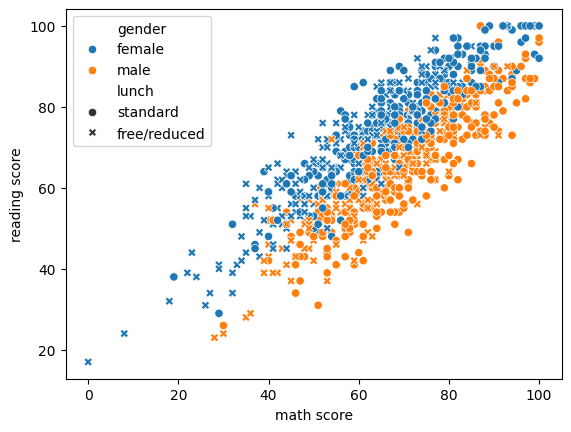

In [13]:
sns.scatterplot(data=df, x='math score', y='reading score', hue='gender', style='lunch');

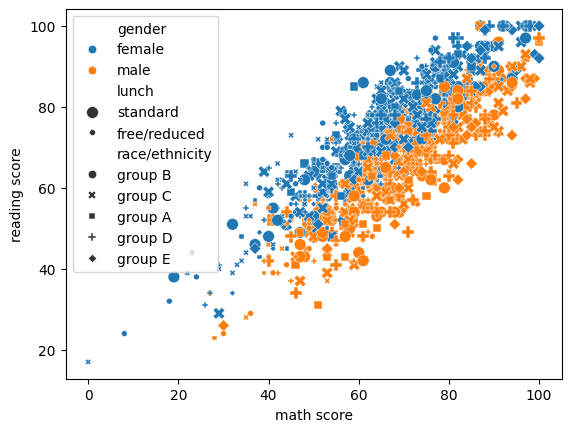

In [14]:
sns.scatterplot(data=df, x='math score', y='reading score', hue='gender', size='lunch', style='race/ethnicity');

In [67]:
gender = {
    'male': 0,
    'female': 1
}


In [68]:
race = {
    'group A': 0,
    'group B': 1,
    'group C': 2,
    'group D': 3,
    'group E': 4
}


In [69]:
df['gender'] = df['gender'].map(gender)
df['race/ethnicity']= df['race/ethnicity'].map(race)

In [70]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
0,1,1,bachelor's degree,standard,none,72,72,74,72.666667
1,1,2,some college,standard,completed,69,90,88,82.333333
2,1,1,master's degree,standard,none,90,95,93,92.666667
3,0,0,associate's degree,free/reduced,none,47,57,44,49.333333
4,0,2,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,1,4,master's degree,standard,completed,88,99,95,94.000000
996,0,2,high school,free/reduced,none,62,55,55,57.333333
997,1,2,high school,free/reduced,completed,59,71,65,65.000000
998,1,3,some college,standard,completed,68,78,77,74.333333


In [71]:
# level = {
#     "high_school": 0,
#     "some_college": 1,
#     "some_high_school": 2,
#     "associate's_degree": 3,
#     "bachelor's_degree": 4,
#     "master's_degree" : 5
# }


In [72]:
# df['parental level of education'] = df['parental level of education'].map(level)

In [73]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
0,1,1,bachelor's degree,standard,none,72,72,74,72.666667
1,1,2,some college,standard,completed,69,90,88,82.333333
2,1,1,master's degree,standard,none,90,95,93,92.666667
3,0,0,associate's degree,free/reduced,none,47,57,44,49.333333
4,0,2,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,1,4,master's degree,standard,completed,88,99,95,94.000000
996,0,2,high school,free/reduced,none,62,55,55,57.333333
997,1,2,high school,free/reduced,completed,59,71,65,65.000000
998,1,3,some college,standard,completed,68,78,77,74.333333


In [74]:
df = pd.get_dummies(df, drop_first=True)

In [75]:
df

,gender,race/ethnicity,math score,reading score,writing score,avg_score,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,1,1,72,72,74,72.666667,True,False,False,False,False,True,True
1,1,2,69,90,88,82.333333,False,False,False,True,False,True,False
2,1,1,90,95,93,92.666667,False,False,True,False,False,True,True
3,0,0,47,57,44,49.333333,False,False,False,False,False,False,True
4,0,2,76,78,75,76.333333,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,4,88,99,95,94.000000,False,False,True,False,False,True,False
996,0,2,62,55,55,57.333333,False,True,False,False,False,False,True
997,1,2,59,71,65,65.000000,False,True,False,False,False,False,False
998,1,3,68,78,77,74.333333,False,False,False,True,False,True,False


In [76]:
x=df.drop(columns='avg_score').values

In [77]:
x

array([[1, 1, 72, ..., False, True, True],
       [1, 2, 69, ..., False, True, False],
       [1, 1, 90, ..., False, True, True],
       ...,
       [1, 2, 59, ..., False, False, False],
       [1, 3, 68, ..., False, True, False],
       [1, 3, 77, ..., False, False, True]], dtype=object)

In [78]:
y = df['avg_score'].values

In [79]:
y

array([ 72.66666667,  82.33333333,  92.66666667,  49.33333333,
        76.33333333,  77.33333333,  91.66666667,  40.66666667,
        65.        ,  49.33333333,  54.66666667,  45.        ,
        73.        ,  73.33333333,  53.66666667,  74.        ,
        87.66666667,  26.        ,  44.66666667,  57.66666667,
        66.        ,  70.        ,  50.33333333,  71.66666667,
        75.        ,  73.        ,  59.33333333,  70.33333333,
        68.33333333,  69.        ,  72.33333333,  63.        ,
        64.33333333,  40.        ,  88.66666667,  80.33333333,
        79.33333333,  57.66666667,  84.33333333,  56.66666667,
        56.66666667,  66.33333333,  58.66666667,  63.33333333,
        53.33333333,  58.66666667,  60.66666667,  71.        ,
        69.        ,  82.66666667,  52.        ,  71.33333333,
        46.33333333,  80.33333333,  80.66666667,  39.        ,
        84.33333333,  52.        ,  58.33333333,   9.        ,
        75.        ,  37.33333333,  59.33333333,  73.33

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
model = RandomForestRegressor()

In [84]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [85]:
predictions = model.predict(x_test)

In [86]:
predictions

array([86.56      , 63.39      , 74.30666667, 75.16666667, 81.63666667,
       77.84333333, 67.05666667, 59.30666667, 77.47666667, 49.44666667,
       47.36666667, 28.54666667, 75.6       , 58.42      , 83.57      ,
       74.55666667, 49.22      , 48.10333333, 52.91      , 61.23      ,
       73.05666667, 49.69666667, 65.57333333, 44.13666667, 78.64666667,
       77.34333333, 71.56666667, 50.14      , 43.29      , 55.67      ,
       59.91666667, 67.05333333, 60.15666667, 73.16      , 77.22      ,
       51.63333333, 75.85333333, 74.29333333, 75.28      , 23.13666667,
       77.92      , 64.50333333, 65.77333333, 60.75      , 85.11      ,
       64.61666667, 71.17666667, 29.26333333, 86.23      , 78.81333333,
       71.87666667, 71.61666667, 77.98      , 53.56      , 71.17333333,
       72.11      , 82.16333333, 54.74666667, 82.97333333, 89.31666667,
       43.89666667, 81.00666667, 78.76333333, 61.11666667, 87.48      ,
       73.25      , 65.59333333, 54.67      , 63.78666667, 88.65

In [87]:
from sklearn.metrics import r2_score

In [88]:
print(r2_score(y_test, predictions))

0.9935018778030997


In [89]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [90]:
X = df.drop(columns=["math score"])
y = df["math score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [91]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [92]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [93]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 0.00
R² Score: 1.00


In [94]:
print(f"Dimensiune X_train: {X_train.shape}, Dimensiune X_test: {X_test.shape}")
print(f"Dimensiune y_train: {y_train.shape}, Dimensiune y_test: {y_test.shape}")


Dimensiune X_train: (800, 12), Dimensiune X_test: (200, 12)
Dimensiune y_train: (800,), Dimensiune y_test: (200,)


In [95]:
print("Exemple comune in train si test:", len(set(y_train) & set(y_test)))


Exemple comune in train si test: 56


In [96]:
print(f"Numar total de duplicate: {df.duplicated().sum()}")


Numar total de duplicate: 0


In [44]:
# splitting the dependent and independent variables


x = df.iloc[:,:12]
y = df.iloc[:,11] # Selects column at index 11, Assuming the target variable is 'avg_score'

print(x.shape)
print(y.shape)

(1000, 12)
(1000,)


In [56]:
# splitting the dataset into training and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 12)
(750,)
(250, 12)
(250,)


In [57]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Identifică coloanele categorice
categorical_features = x.select_dtypes(include=['object']).columns

# Aplică One-Hot Encoding
x_encoded = pd.get_dummies(x, columns=categorical_features, drop_first=True)

# Împărțim setul de date în train și test
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.25, random_state=45)

# Aplicăm MinMaxScaler doar pe variabilele numerice
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


# **Modelling**

## **Logistic Regression**

In [59]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

# Prezicem și afișăm acuratețea
y_pred = model.predict(x_test_scaled)
print("Training Accuracy:", model.score(x_train_scaled, y_train))
print("Testing Accuracy:", model.score(x_test_scaled, y_test))

Training Accuracy: 0.192
Testing Accuracy: 0.028


In [60]:
# printing the confusion matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
print(cm)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# **Random Forest**

In [61]:
from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.836


In [62]:
# printing the confusion matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
print(cm)

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 0 0 1]]


In [63]:
# k fold cross validation

from sklearn.model_selection import cross_val_score

# computing accuracies for 20 different model's accuracy
accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 20)
print(accuracies)

# computing mean of accuaracies obtained by all the models
print("mean accuracy :", accuracies.mean())

# computing the standard variance of the models
print("mean standard variance :", accuracies.std())

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=20.
  warnings.warn(


[0.86842105 0.84210526 0.94736842 0.76315789 0.84210526 0.94736842
 0.84210526 0.84210526 0.73684211 0.81578947 0.83783784 0.86486486
 0.81081081 0.81081081 0.81081081 0.94594595 0.86486486 0.86486486
 0.86486486 0.89189189]
mean accuracy : 0.85074679943101
mean standard variance : 0.0536912635456555


# **Decision Forest**

In [66]:
from sklearn.tree import DecisionTreeClassifier

# creating a model
model = DecisionTreeClassifier()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.98


In [67]:
# printing the confusion matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
print(cm)

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 1]]


In [68]:
# k fold cross validation

from sklearn.model_selection import cross_val_score

# computing accuracies for 20 different model's accuracy
accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 20)
print(accuracies)

# computing mean of accuaracies obtained by all the models
print("mean accuracy :", accuracies.mean())

# computing the standard variance of the models
print("mean standard variance :", accuracies.std())

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=20.
  warnings.warn(


[0.94736842 0.94736842 0.97368421 0.94736842 0.97368421 1.
 1.         0.97368421 1.         0.94736842 0.97297297 0.97297297
 0.94594595 0.94594595 0.97297297 0.97297297 1.         1.
 1.         1.        ]
mean accuracy : 0.9747155049786629
mean standard variance : 0.021374404373218765


# **Support Vector Machine**

In [69]:
from sklearn.svm import SVC

# creating a model
model = SVC()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.07466666666666667
Testing Accuracy : 0.064


In [70]:
# printing the confusion matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
print(cm)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [71]:
plt.style.use('fivethirtyeight')

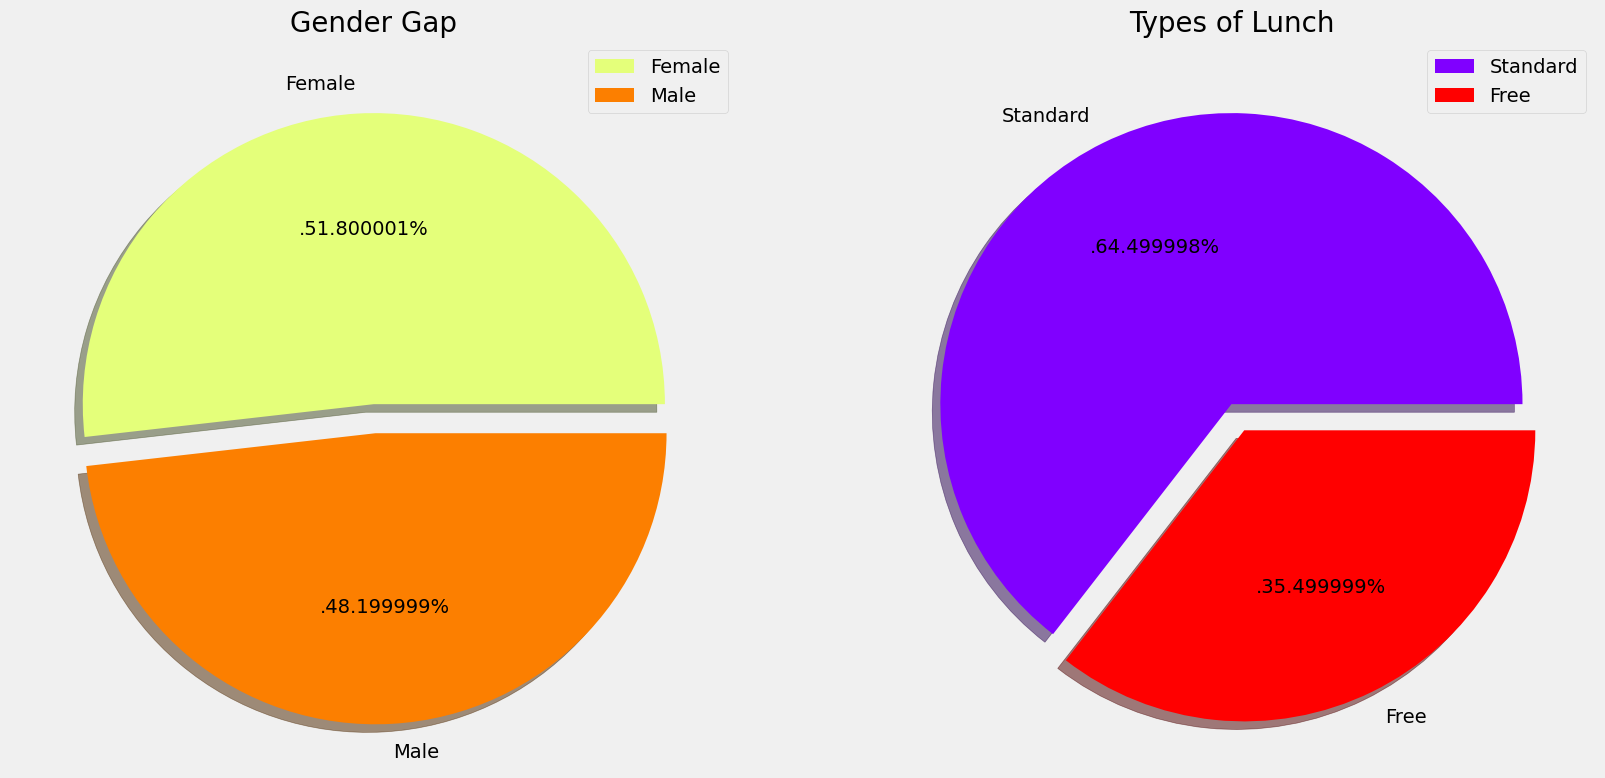

In [72]:
# visualising the number of male and female in the dataset

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]

plt.pie(size, colors = color,  explode = explode, labels = labels, shadow = True, autopct = '.%2f%%')
plt.title('Gender Gap', fontsize = 20)
plt.axis('off')
plt.legend()


plt.subplot(1, 2, 2)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = plt.cm.rainbow(np.linspace(0, 1, 2))
explode = [0, 0.1]

plt.pie(size, colors = color,  explode = explode, labels = labels, shadow = True, autopct = '.%2f%%')
plt.title('Types of Lunch', fontsize = 20)
plt.axis('off')
plt.legend()
plt.tight_layout()
plt.grid()

plt.show()

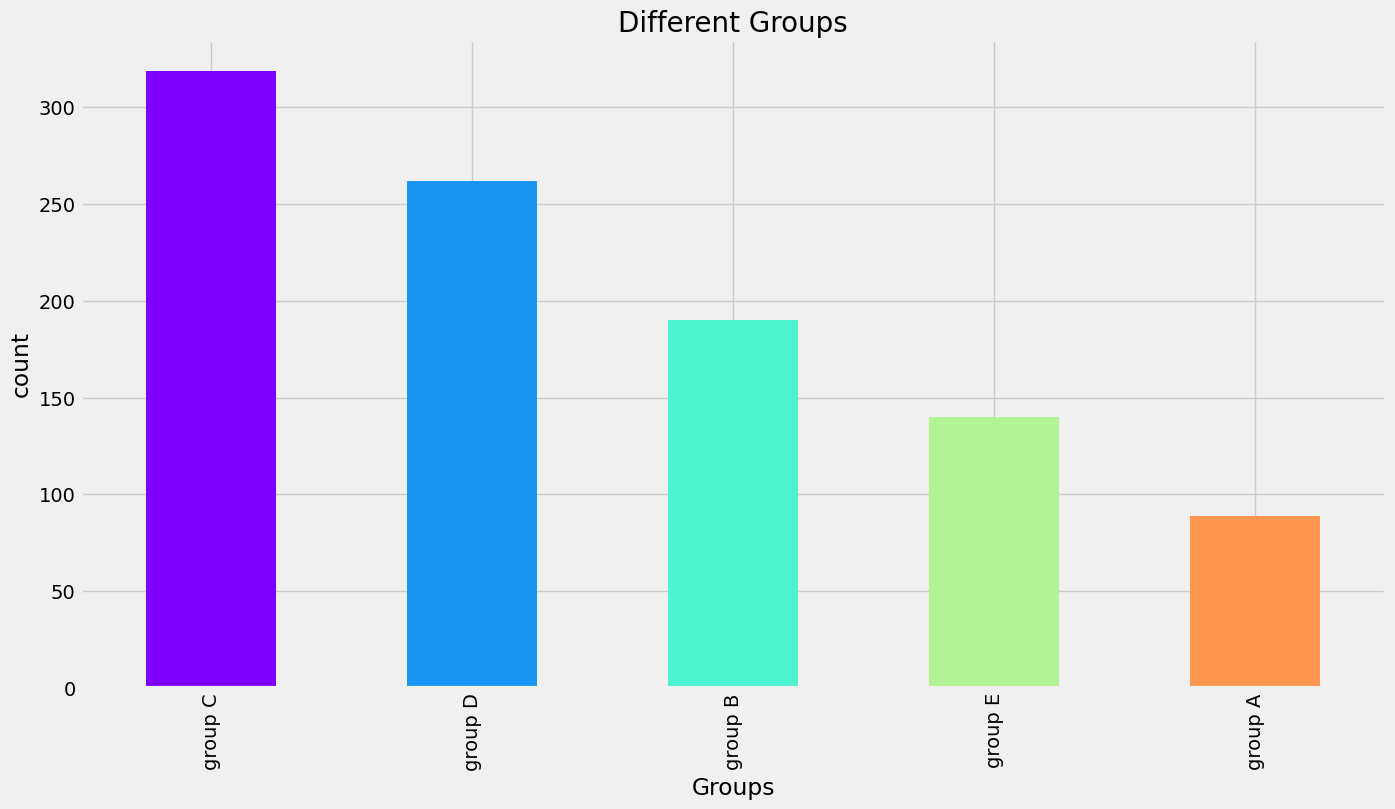

In [73]:
# visualizing the different groups in the dataset

plt.rcParams['figure.figsize'] = (15, 8)
color = plt.cm.rainbow(np.linspace(0, 1, 6))
df['race/ethnicity'].value_counts(dropna = False).plot.bar(color = color)
plt.title('Different Groups', fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

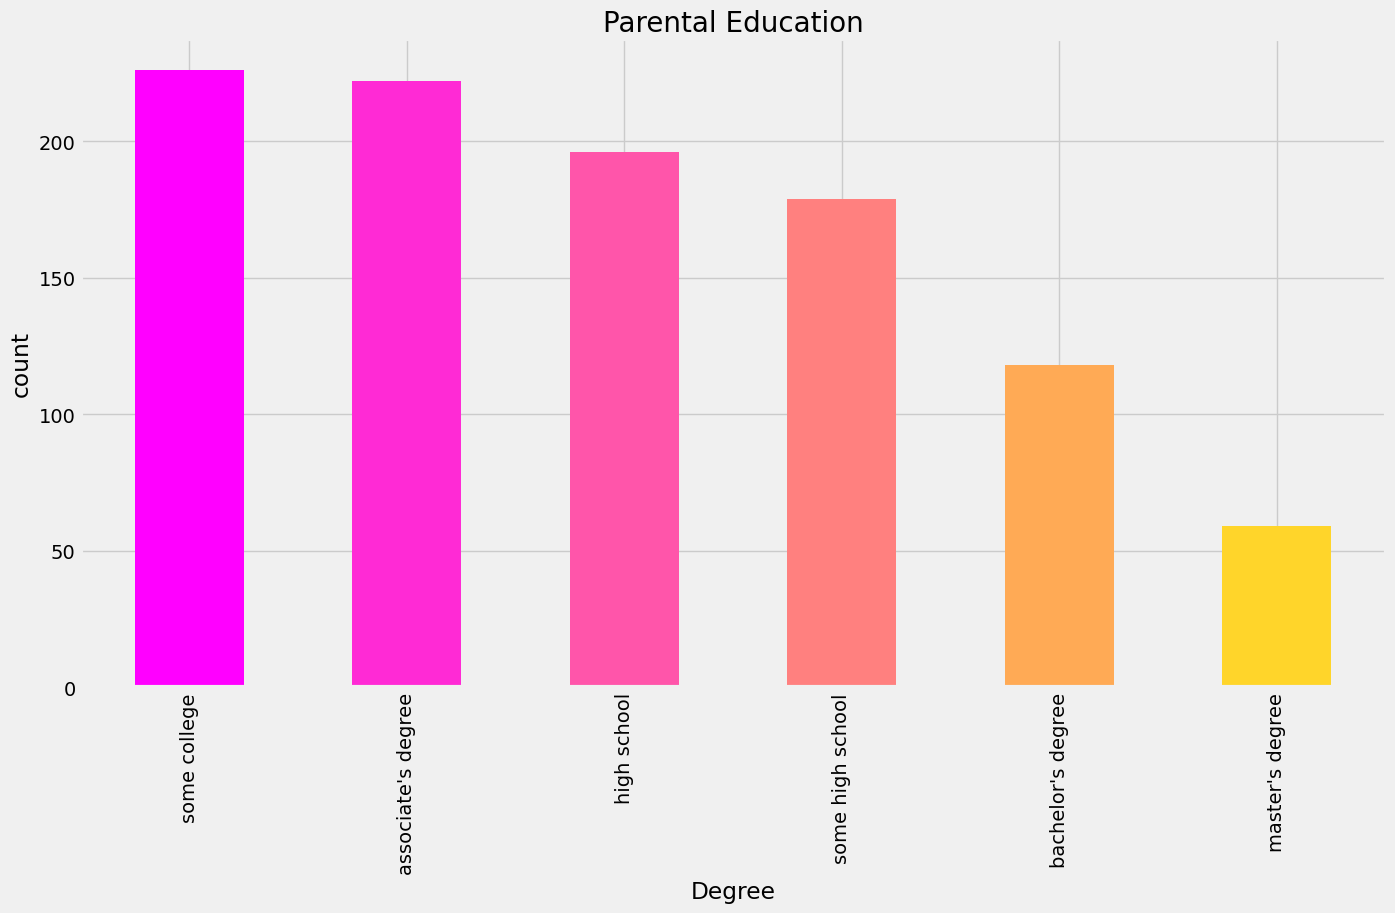

In [74]:
# visualizing the differnt parental education levels

plt.rcParams['figure.figsize'] = (15, 8)
color = plt.cm.spring(np.linspace(0, 1, 7))
df['parental level of education'].value_counts(dropna = False).plot.bar(color = color)
plt.title('Parental Education', fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

<ipython-input-75-2f8b563e9b05>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['math score'], color = 'pink')
<ipython-input-75-2f8b563e9b05>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['writing score'], color = 'blue')
<ipython-input-75-2f8b563e9b05>:18: UserWarning: 

`distplot` 

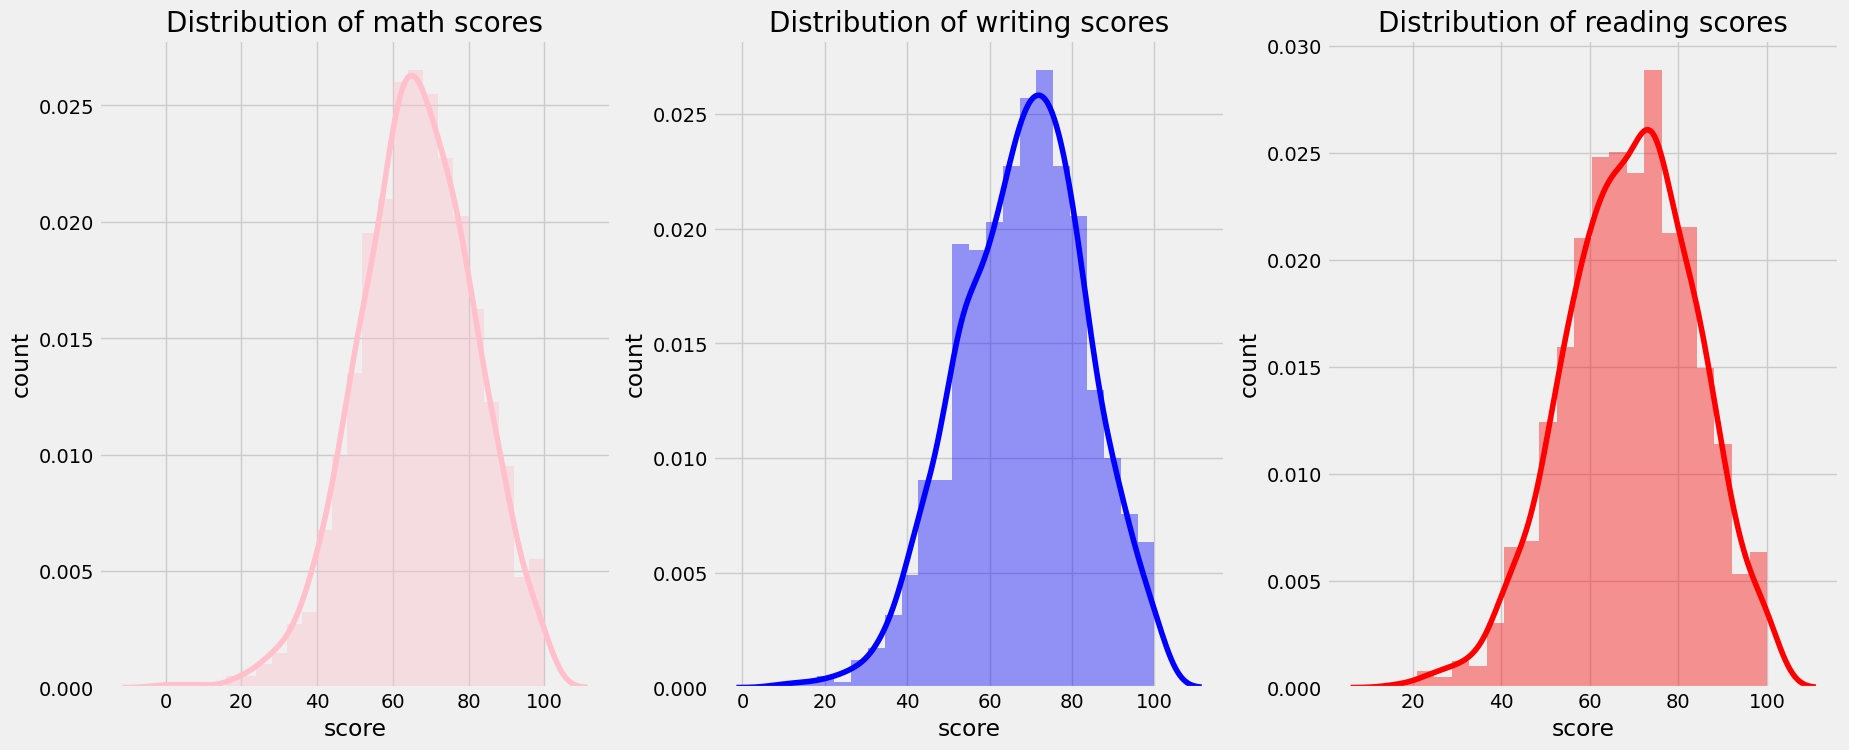

In [75]:
# visualizing maths score

plt.rcParams['figure.figsize'] = (20, 8)

plt.subplot(1, 3, 1)
sns.distplot(df['math score'], color = 'pink')
plt.title('Distribution of math scores', fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')

plt.subplot(1, 3, 2)
sns.distplot(df['writing score'], color = 'blue')
plt.title('Distribution of writing scores', fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')

plt.subplot(1, 3, 3)
sns.distplot(df['reading score'], color = 'red')
plt.title('Distribution of reading scores', fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')

plt.show()